# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import json

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
url_content = response.content
tsv_file = open('image_prediction.tsv', 'wb').write(url_content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
tweets = []
with open('tweet_json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets.append(data)
tweet_count = pd.DataFrame(tweets, columns=['id', 'retweet_count', 'favorite_count'])

## Assessing Data

In [5]:
tweet_count

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [6]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [7]:
tweet_count.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [8]:
tweet_count.id.duplicated().sum()

0

In [9]:
tweet_count[tweet_count.isna()].sum()

id                0.0
retweet_count     0.0
favorite_count    0.0
dtype: float64

In [10]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive_enhanced.loc[twitter_archive_enhanced['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [13]:
twitter_archive_enhanced.loc[twitter_archive_enhanced['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [14]:
twitter_archive_enhanced.tweet_id.duplicated().sum()

0

In [15]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator != 10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 313 to 2335
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    23 non-null     int64  
 1   in_reply_to_status_id       5 non-null      float64
 2   in_reply_to_user_id         5 non-null      float64
 3   timestamp                   23 non-null     object 
 4   source                      23 non-null     object 
 5   text                        23 non-null     object 
 6   retweeted_status_id         1 non-null      float64
 7   retweeted_status_user_id    1 non-null      float64
 8   retweeted_status_timestamp  1 non-null      object 
 9   expanded_urls               19 non-null     object 
 10  rating_numerator            23 non-null     int64  
 11  rating_denominator          23 non-null     int64  
 12  name                        23 non-null     object 
 13  doggo                       23 no

In [17]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
articles = twitter_archive_enhanced[twitter_archive_enhanced['name'].str.len() <= 3]
articles.name.value_counts()

a      55
Bo      9
the     8
an      7
Leo     6
       ..
Blu     1
his     1
all     1
Tom     1
Stu     1
Name: name, Length: 68, dtype: int64

In [20]:
twitter_archive_enhanced[twitter_archive_enhanced['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [21]:
image_prediction = pd.read_csv('image_prediction.tsv', sep = '\t')

In [22]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [24]:
all_columns = pd.Series(list(tweet_count) + list(twitter_archive_enhanced) + list(image_prediction))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

In [25]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
1. The rows in the twitter_archive_enhanced table includes original tweets and retweets and replies but only original tweets are required

2. Missing data in the twitter_archive_enhanced table for these variables in_reply_status_id, in_reply_to_users, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

3. Variable name tweet_id in twitter_archive_enhanced table is integer not string

4. There are rows of data with incorrect rating in twitter_archive_enhanced table

5. timestamp variable data type in twitter_archive_enhanced table is object instead of datetime

6. Nulls represented as None in name, doggo, floofer, pupper, puppo columns in the twitter_archive_enhanced table

7. tweet_id in image_prediction table is integer instead of object

8. the variable name id in tweet_count table is inconsistent with the variables names in twitter_archive_enhanced table and image_prediction table where it is tweet_id

### Tidiness issues
1. Dog stage such as doggo, floofer, pupper, puppo in twitter_archive_enhanced table should make up one variable

2. The true prediction of dog breeds in image_prediction table should be collapsed into one column or variable and irelevant columns dropped

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
tweet_count_clean = tweet_count.copy()
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_prediction_clean = image_prediction.copy()

### Quality

### Issue #1: 
The rows in the twitter_archive_enhanced table includes original tweets, retweets as well as replies but only original tweets are required

#### Define:
Filter the rows containing a value for retweeted_status_id and in_reply_to_status_id in order to obtain the original tweets

#### Code

In [27]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isna()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['in_reply_to_status_id'].isna()]

#### Test

In [28]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2:
Missing data in the twitter_archive_enhanced table for these variables in_reply_status_id, in_reply_to_users, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

#### Define
drop the following columns  in_reply_status_id, in_reply_to_users, retweeted_status_user_id, retweeted_status_timestamp, since they contain lots of missing data and are not relevant

#### Code

In [31]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                                                                      'retweeted_status_id',
                                                                      'retweeted_status_user_id', 
                                                                      'retweeted_status_timestamp'], axis=1)

#### Test

In [32]:
list(twitter_archive_enhanced_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [33]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3:
Variable name tweet_id in twitter_archive_enhanced table is integer not string

#### Define
Change the data type of tweet_id in the twitter_archive_enhance table to string using the astype function

#### Code

In [34]:
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype('str')

#### Test

In [35]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


### Issue #4:
There are rows of data with incorrect rating in twitter_archive_enhanced table 

#### Define
filter rows where the rating_denominator column value is not equal to 10 in the twitter_archive_enhanced table

#### Code

In [36]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_denominator'] == 10]

#### Test

In [37]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:
timestamp variable data type in twitter_archive_enhanced table is object instead of datetime

#### Define
Change the data type of timestamp from object to datetime using the to_datetime function

#### Code

In [38]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

#### Test

In [39]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   doggo               2080 non-null   object             
 9   floofer             2080 non-null   object             
 10  pupper              2080 non-null   object             
 11  puppo               2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #6:
Nulls represented as None in name, doggo, floofer, pupper, puppo columns in the twitter_archive_enhanced table

#### Define
replace the None in the twitter_archive_enhanced_clean table with Null

#### Code

In [40]:
twitter_archive_enhance_clean = twitter_archive_enhanced_clean.replace('None', np.nan, inplace = True)

#### Test

In [41]:
twitter_archive_enhance_clean

### Issue #7:
tweet_id in image_prediction table is integer instead of string

#### Define
Change the data type of tweet_id from integer to string

#### Code

In [42]:
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

#### Test

In [43]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8:
the variable name id in tweet_count table is inconsistent with the variables names in twitter_archive_enhanced table and image_prediction table where it is tweet_id

#### Define
Change the column name of id in tweet_count to tweet_id

#### Code

In [44]:
tweet_count_clean.rename({'id' : 'tweet_id'}, axis=1, inplace=True)
tweet_count_clean['tweet_id'] = tweet_count_clean['tweet_id'].astype('str')

#### Test

In [45]:
list(tweet_count_clean)

['tweet_id', 'retweet_count', 'favorite_count']

### Tidiness

### Issue #1:
Dog stage such as doggo, floofer, pupper, puppo in twitter_archive_enhanced table should make up one variable

#### Define
- merge the the following dog stages doggo, floofer, pupper, puppo into one column called dog_stage
- filter out rows with more than one dog stage
- Filter rows that contains articles, pronouns and other non name values in the name column

#### Code

In [46]:
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['doggo'].fillna('') + twitter_archive_enhanced_clean['floofer'].fillna('') + twitter_archive_enhanced_clean['pupper'].fillna('') + twitter_archive_enhanced_clean['puppo'].fillna('')
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['dog_stage'] != 'doggopupper']
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['dog_stage'] != 'doggopuppo']
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['dog_stage'] != 'doggofloofer']
twitter_archive_enhance_clean = twitter_archive_enhanced_clean.replace('', np.nan, inplace = True)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['text'].str.contains('doggo', case = False), "dog_stage"] = 'doggo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['text'].str.contains('floofer', case = False), "dog_stage"] = 'floofer'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['text'].str.contains('pupper', case = False), "dog_stage"] = 'pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['text'].str.contains('puppo', case = False), "dog_stage"] = 'puppo'

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['name'].str.contains('a|the|an|his|all', case = False, na = False)]

#### Test

In [47]:
twitter_archive_enhanced_clean['dog_stage'].value_counts()

pupper     180
doggo       64
puppo       21
floofer      8
Name: dog_stage, dtype: int64

In [48]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['dog_stage'].str.contains('doggo|floofer|pupper|puppo', case = False, na = False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
29,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
49,882762694511734784,2017-07-06 00:46:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper
71,878776093423087618,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo
...,...,...,...,...,...,...,...,...,...
1985,672898206762672129,2015-12-04 22:00:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,pupper
1991,672622327801233409,2015-12-04 03:43:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,https://twitter.com/dog_rates/status/672622327...,12,10,NaN,pupper
1995,672594978741354496,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper
2009,672254177670729728,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper


In [49]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 1 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1409 non-null   object             
 1   timestamp           1409 non-null   datetime64[ns, UTC]
 2   source              1409 non-null   object             
 3   text                1409 non-null   object             
 4   expanded_urls       1406 non-null   object             
 5   rating_numerator    1409 non-null   int64              
 6   rating_denominator  1409 non-null   int64              
 7   name                823 non-null    object             
 8   dog_stage           273 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 110.1+ KB


### Issue #2:
The true prediction of dog breeds in image_prediction table should be collapsed into one column or variable and irelevant columns dropped

#### Define
- Filter out rows in image_prediction_clean table where p1, p2 and p3 values are False
- Create a new column max_conf were the maximum values across p1_conf, p2_conf and p3_conf is recorded
- Melt the categories [p1, p2, p3], [p1_conf, p2_conf, p3_conf] and [p1_dog, p2_dog, p3_dog] into separate dataframes and concatenate

#### Code

In [50]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['p1_dog'] & ['p2_dog'] & ['p3_dog'] != False]
image_prediction_clean['max_conf'] = image_prediction_clean[['p1_conf', 'p2_conf', 'p3_conf']].max(axis = 1)

df1 = image_prediction_clean.melt(id_vars=['tweet_id', 'jpg_url', 'img_num', 'max_conf'],
                           value_vars = ['p1', 'p2', 'p3'], 
                                 var_name = 'pred_num', 
                                 value_name = 'breeds'
                                )
df2 = image_prediction_clean.melt(id_vars=['tweet_id', 'jpg_url', 'img_num', 'max_conf'],
                           value_vars = ['p1_conf', 'p2_conf', 'p3_conf'], 
                                 var_name = 'p_conf_num', 
                                 value_name = 'p_conf'
                                )
df3 = image_prediction_clean.melt(id_vars=['tweet_id', 'jpg_url', 'img_num', 'max_conf'],
                           value_vars = ['p1_dog', 'p2_dog', 'p3_dog'], 
                                 var_name = 'p_dog_num', 
                                 value_name = 'p_dog'
                                )
df1 = df1.set_index(['tweet_id', 'jpg_url', 'img_num', 'max_conf', df1.groupby(['tweet_id', 'jpg_url', 'img_num', 'max_conf']).cumcount()])
df2 = df2.set_index(['tweet_id', 'jpg_url', 'img_num', 'max_conf', df2.groupby(['tweet_id', 'jpg_url', 'img_num', 'max_conf']).cumcount()])
df3 = df3.set_index(['tweet_id', 'jpg_url', 'img_num', 'max_conf', df3.groupby(['tweet_id', 'jpg_url', 'img_num', 'max_conf']).cumcount()])
image_prediction_clean = (pd.concat([df1, df2, df3], axis = 1)
      .sort_index(level = 4)
      .reset_index(level = 4, drop = True)
      .reset_index())

image_prediction_clean = image_prediction_clean[image_prediction_clean['max_conf'] == image_prediction_clean['p_conf']]
image_prediction_clean = image_prediction_clean[image_prediction_clean['p_dog'] == True]

image_prediction_clean = image_prediction_clean.drop(['max_conf', 'p_conf_num', 'p_dog_num', 'p_dog'], axis=1)
image_prediction_clean.breeds = image_prediction_clean.breeds.str.lower()

#### Test

In [51]:
image_prediction_clean

,tweet_id,jpg_url,img_num,pred_num,breeds,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311
...,...,...,...,...,...,...
1527,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,p1,appenzeller,0.341703
1528,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,p1,chesapeake_bay_retriever,0.425595
1529,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p1,basset,0.555712
1530,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p1,chihuahua,0.716012


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive_enhanced_clean, tweet_count_clean, on='tweet_id'), 
                                  image_prediction_clean, on='tweet_id')
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [53]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            959 non-null    object             
 1   timestamp           959 non-null    datetime64[ns, UTC]
 2   source              959 non-null    object             
 3   text                959 non-null    object             
 4   expanded_urls       959 non-null    object             
 5   rating_numerator    959 non-null    int64              
 6   rating_denominator  959 non-null    int64              
 7   name                625 non-null    object             
 8   dog_stage           175 non-null    object             
 9   retweet_count       959 non-null    int64              
 10  favorite_count      959 non-null    int64              
 11  jpg_url             959 non-null    object             
 12  img_num             959 non-null    

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,pred_num,breeds,p_conf
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p1,chihuahua,0.323581
1,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,p1,chesapeake_bay_retriever,0.425595
2,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,p1,pomeranian,0.566142
3,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,p1,irish_terrier,0.487574
4,889880896479866881,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,5156,28268,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,p1,french_bulldog,0.377417


The Code above loads the tidied master csv file as a dataframe

In [55]:
twitter_archive_master.breeds.value_counts()

golden_retriever           89
pembroke                   60
labrador_retriever         58
chihuahua                  52
pug                        37
                           ..
black-and-tan_coonhound     1
clumber                     1
silky_terrier               1
sussex_spaniel              1
keeshond                    1
Name: breeds, Length: 111, dtype: int64

The code above assesses the most common breeds of dogs in the dataset using value_counts and showed that the Golden retriever, Pembroke and Labrador retriever were the most common

In [56]:
twitter_archive_master.dog_stage.value_counts()

pupper     113
doggo       38
puppo       18
floofer      6
Name: dog_stage, dtype: int64

The code above assesses the most common dogs stages using value_counts and was shown to be the pupper

In [57]:
twitter_archive_master.groupby('breeds')['retweet_count'].mean().sort_values(ascending = False).head(10)

breeds
standard_poodle            14594.333333
mexican_hairless           10737.000000
english_springer            9555.000000
black-and-tan_coonhound     8285.000000
eskimo_dog                  6569.833333
afghan_hound                6308.000000
tibetan_mastiff             5628.500000
great_pyrenees              5297.000000
lakeland_terrier            5244.230769
leonberg                    5209.000000
Name: retweet_count, dtype: float64

The code above identifies 10 dog breeds with the highest mean retweet counts of which Standard_poodle as wells as Mexican hairless were the highest

In [58]:
twitter_archive_master.groupby('breeds')['favorite_count'].mean().sort_values(ascending = False).head(10)

breeds
mexican_hairless           34222.000000
black-and-tan_coonhound    33911.000000
standard_poodle            33571.333333
english_springer           23029.600000
leonberg                   20820.500000
afghan_hound               17337.500000
giant_schnauzer            17314.500000
weimaraner                 17308.000000
border_terrier             16741.000000
irish_water_spaniel        16400.000000
Name: favorite_count, dtype: float64

The code above identifies 10 dog breeds with the highest mean favorite counts and it includes  Mexican hairless, black-and-tan_coonhound and Standard_poodle

In [59]:
twitter_archive_master.groupby('breeds')['rating_numerator'].mean().sort_values(ascending = False).head(5)

breeds
clumber                    27.000000
black-and-tan_coonhound    14.000000
mexican_hairless           13.000000
saluki                     13.000000
kuvasz                     12.777778
Name: rating_numerator, dtype: float64

The code above identifies dog breeds with the highest numerator rating in descending order (5)

In [60]:
twitter_archive_master['timestamp'].agg(['min', 'max'])

min    2015-11-15 22:32:08+00:00
max    2017-08-01 00:17:27+00:00
Name: timestamp, dtype: object

The code above shows the time frame of tweets analysed

### Insights:
1. Golden retriever dog breeds appears to be the most commonly rated dogs by @WeRAteDogs followed by Pembroke, Labrador_retriever and Chihuahua         

2. The most common stage of dogs that appear in the data set is the Pupper

3. The Standard poodle, Mexican hairless and English springer dog breeds seeems to have the highest mean retweet counts while the Mexican_hairless, Black-and-tan_coonhound and Standard_poodle have the highest mean favorite counts in descending order

4. The dog breeds with the highest mean numerator rating in descending order includes the following Clumber, Black-and-tan_coonhound, Saluki, Mexican_hairless and Kuvasz

### Visualization

Text(0.5, 1.0, 'Dog breeds with the highest Numerator ratings')

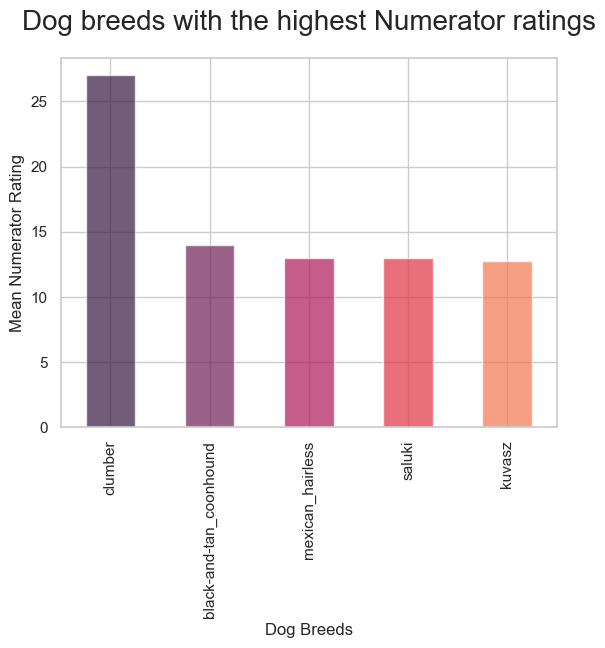

In [61]:
pal = sns.color_palette('rocket')
sns.set(style="whitegrid", color_codes=True)
twitter_archive_master.groupby('breeds')['rating_numerator'].mean().sort_values(
    ascending = False).head(5).plot(
    kind='bar', color = pal, alpha=.7);
plt.xlabel('Dog Breeds', fontsize=12)
plt.ylabel('Mean Numerator Rating', fontsize=12)
plt.title('Dog breeds with the highest Numerator ratings', pad = 20, fontsize= 20)

The visualisation above shows the first 5 Dog breeds with the highesst mean numerator ratiings in descending order using the twitter_archive_master dataframe